# $Classification- Project$

## - Requirements: 

1. Pre-processing of the dataset

2. Use all Diagnostics techniques explained in the lecture (Confusion Matrix / ROC Curves / {Stratified} K-folds)

3. Compare between the performance of ALL the following classifiers: **KNN / Naive Bayes / Logistic Regression / Decision Trees and Random Forests**

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, roc_curve,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Loading the csv and PreProcessing

In [2]:
df=pd.read_csv('green_trip_data_{17}-{5}clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032408 entries, 0 to 1032407
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   vendor                 1032408 non-null  int64  
 1   lpep_pickup_datetime   1032408 non-null  object 
 2   lpep_dropoff_datetime  1032408 non-null  object 
 3   store_and_fwd_flag     1032408 non-null  int64  
 4   rate_type              1032408 non-null  int64  
 5   pu_location            1032408 non-null  int64  
 6   do_location            1032408 non-null  int64  
 7   passenger_count        1032408 non-null  float64
 8   trip_distance          1032408 non-null  float64
 9   fare_amount            1032408 non-null  float64
 10  extra                  1032408 non-null  float64
 11  mta_tax                1032408 non-null  float64
 12  tip_amount             1032408 non-null  float64
 13  tolls_amount           1032408 non-null  float64
 14  improvement_surcha

In [3]:

df2=df.drop(['lpep_pickup_datetime','lpep_dropoff_datetime','pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude','week_num_disc'],axis=1)


## Function to categorize data

In [4]:
def categorize_total_amount(amount):
    if amount < 20:
        return 1
    elif 20 <= amount <= 80:
        return 2
    else:
        return 3

# Apply the categorize_total_amount function to create a new column


In [5]:
df2['category'] = df2['total_amount'].apply(lambda x: categorize_total_amount(x))

In [6]:
df2['category'].value_counts()

category
1    840822
2    190028
3      1558
Name: count, dtype: int64

In [7]:
cols=df2.drop(['category','total_amount','fare_amount','mta_tax','tip_amount','average_mile_fare','extra','tolls_amount','improvement_surcharge'],axis=1).columns
cols

Index(['vendor', 'store_and_fwd_flag', 'rate_type', 'pu_location',
       'do_location', 'passenger_count', 'trip_distance', 'payment_type',
       'trip_type', 'trip_duration', 'trip_issue', 'weekend', 'week_num'],
      dtype='object')

## Dataset for Training

In [8]:
x=df2[cols]
y=df2['category']

In [10]:
x.head()

,vendor,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,payment_type,trip_type,trip_duration,trip_issue,weekend,week_num
0,1,0,5,47,90,1.0,1.04,0,1,10.366667,0,0,1
1,1,0,5,100,53,1.0,3.55,0,1,13.650000,0,0,1
2,1,0,5,53,71,1.0,2.23,1,1,10.266667,0,0,1
3,1,0,5,71,56,1.0,4.71,1,1,8.533333,0,0,1
4,0,0,5,191,109,1.0,4.50,1,1,13.683333,0,0,1


## $I-$ Decision Trees

In [12]:
dtree = DecisionTreeClassifier(max_depth=15,max_features=10)
dtree_scale=DecisionTreeClassifier(max_depth=15,max_features=10)

In [13]:
tgrid=GridSearchCV(estimator=dtree,param_grid={'max_depth':[5,13,17],'max_features':[5,7,15]})


### Train/test split


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=19,test_size=0.3)

In [10]:
scaler = StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)
X=scaler.fit_transform(x)

In [11]:
X=pd.DataFrame(X,columns=cols)
X_train=pd.DataFrame(X_train,columns=cols)
X_test=pd.DataFrame(X_test,columns=cols)


In [20]:
X_train.head()

,vendor,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,payment_type,trip_type,trip_duration,trip_issue,weekend,week_num
0,0.507252,-0.03899,0.115305,0.652104,1.272197,3.517645,0.374221,0.938902,0.108620,-0.503907,-0.03649,-0.894858,-1.319104
1,0.507252,-0.03899,0.115305,0.652104,1.689605,-0.349380,-0.583779,0.938902,0.108620,-0.664196,-0.03649,-0.894858,-1.319104
2,0.507252,-0.03899,0.115305,-0.014125,0.120150,-0.349380,-0.459132,-0.984130,0.108620,-0.465376,-0.03649,1.117496,-0.615754
3,0.507252,-0.03899,-6.929206,1.297514,1.455856,-0.349380,0.075069,0.938902,-9.206426,-0.332830,-0.03649,-0.894858,0.790946
4,-1.971406,-0.03899,0.115305,-0.201502,-0.263865,-0.349380,-0.505429,-0.984130,0.108620,-0.462294,-0.03649,-0.894858,-1.319104


In [14]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features=10)

In [15]:

dtree_scale.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features=10)

In [16]:
y_pred=dtree.predict(x_test)
y_pred_scale=dtree_scale.predict(X_test)

In [17]:
tt_split=dtree.score(x_test,y_test)
tt_scale=dtree_scale.score(X_test,y_test)
tt_split,tt_scale

(0.974157553685067, 0.9742608718112636)

### $A- $ Confusion Matrix without scaling

Text(0.5, 0.98, 'Confusion Matrix for Decision tree Model without scaling')

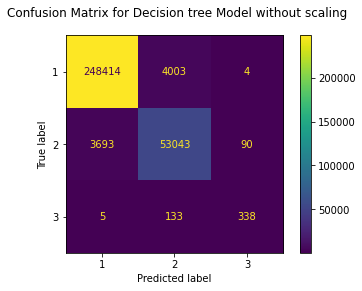

In [30]:
cm=confusion_matrix(y_test,y_pred)
labels=[1,2,3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
disp.figure_.suptitle('Confusion Matrix for Decision tree Model without scaling')

### ROC Curves

In [18]:
target_categories = [1,2,3]
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
y_score = dtree.fit(x_train, y_train).predict_proba(x_test)

In [19]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
label_binarizer.transform([3]), label_binarizer.transform([2]), label_binarizer.transform([1]) 

(array([[0, 0, 1]]), array([[0, 1, 0]]), array([[1, 0, 0]]))

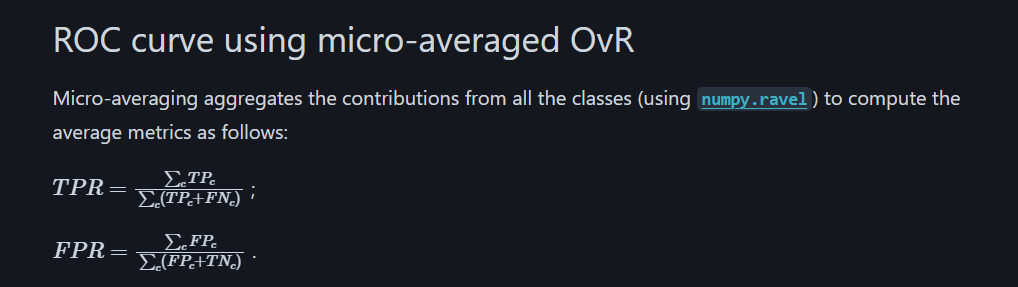

In [22]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.99


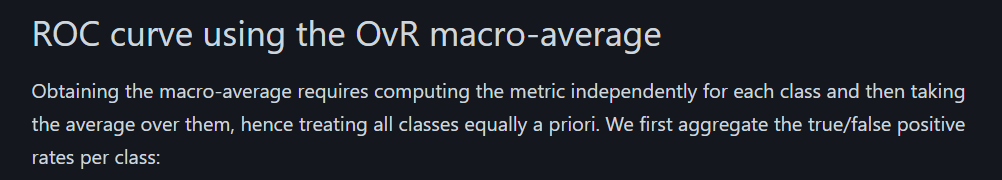

In [96]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.95


#### Plot all OvR ROC curves together


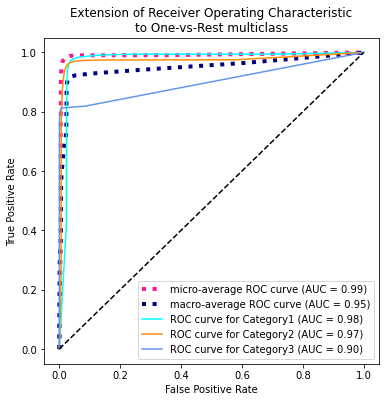

In [97]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for Category{target_categories[class_id]}",
        color=color,
        ax=ax,
    )

# Add chance level (y=x) line (solid black, with legend entry)
ax.plot([0, 1], [0, 1], color="black", linestyle="--", label="Chance level (AUC = 0.5)")

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

### $B-$ Confusion Matrix with scaling

Text(0.5, 0.98, 'Confusion Matrix for Decision tree Model with scaling')

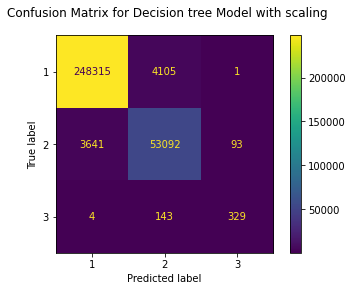

In [31]:
cm_scale=confusion_matrix(y_test,y_pred_scale)
labels=[1,2,3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_scale, display_labels=labels)
disp.plot()
disp.figure_.suptitle('Confusion Matrix for Decision tree Model with scaling')

[Text(0.5, 0.875, 'trip_distance <= 6.897\ngini = 0.133\nsamples = 722685\nvalue = [671012, 51234, 439]\nclass = low'),
 Text(0.25, 0.625, 'trip_duration <= 35.292\ngini = 0.032\nsamples = 670030\nvalue = [659120, 10906, 4]\nclass = low'),
 Text(0.125, 0.375, 'trip_duration <= 28.125\ngini = 0.013\nsamples = 658857\nvalue = [654441, 4415, 1]\nclass = low'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'payment_type <= 0.5\ngini = 0.487\nsamples = 11173\nvalue = [4679, 6491, 3]\nclass = medium'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'trip_duration <= 24.492\ngini = 0.362\nsamples = 52655\nvalue = [11892, 40328, 435]\nclass = medium'),
 Text(0.625, 0.375, 'trip_distance <= 9.445\ngini = 0.499\nsamples = 14909\nvalue = [7797, 7108, 4]\nclass = low'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'tolls_amount <= 12.33\ngini = 

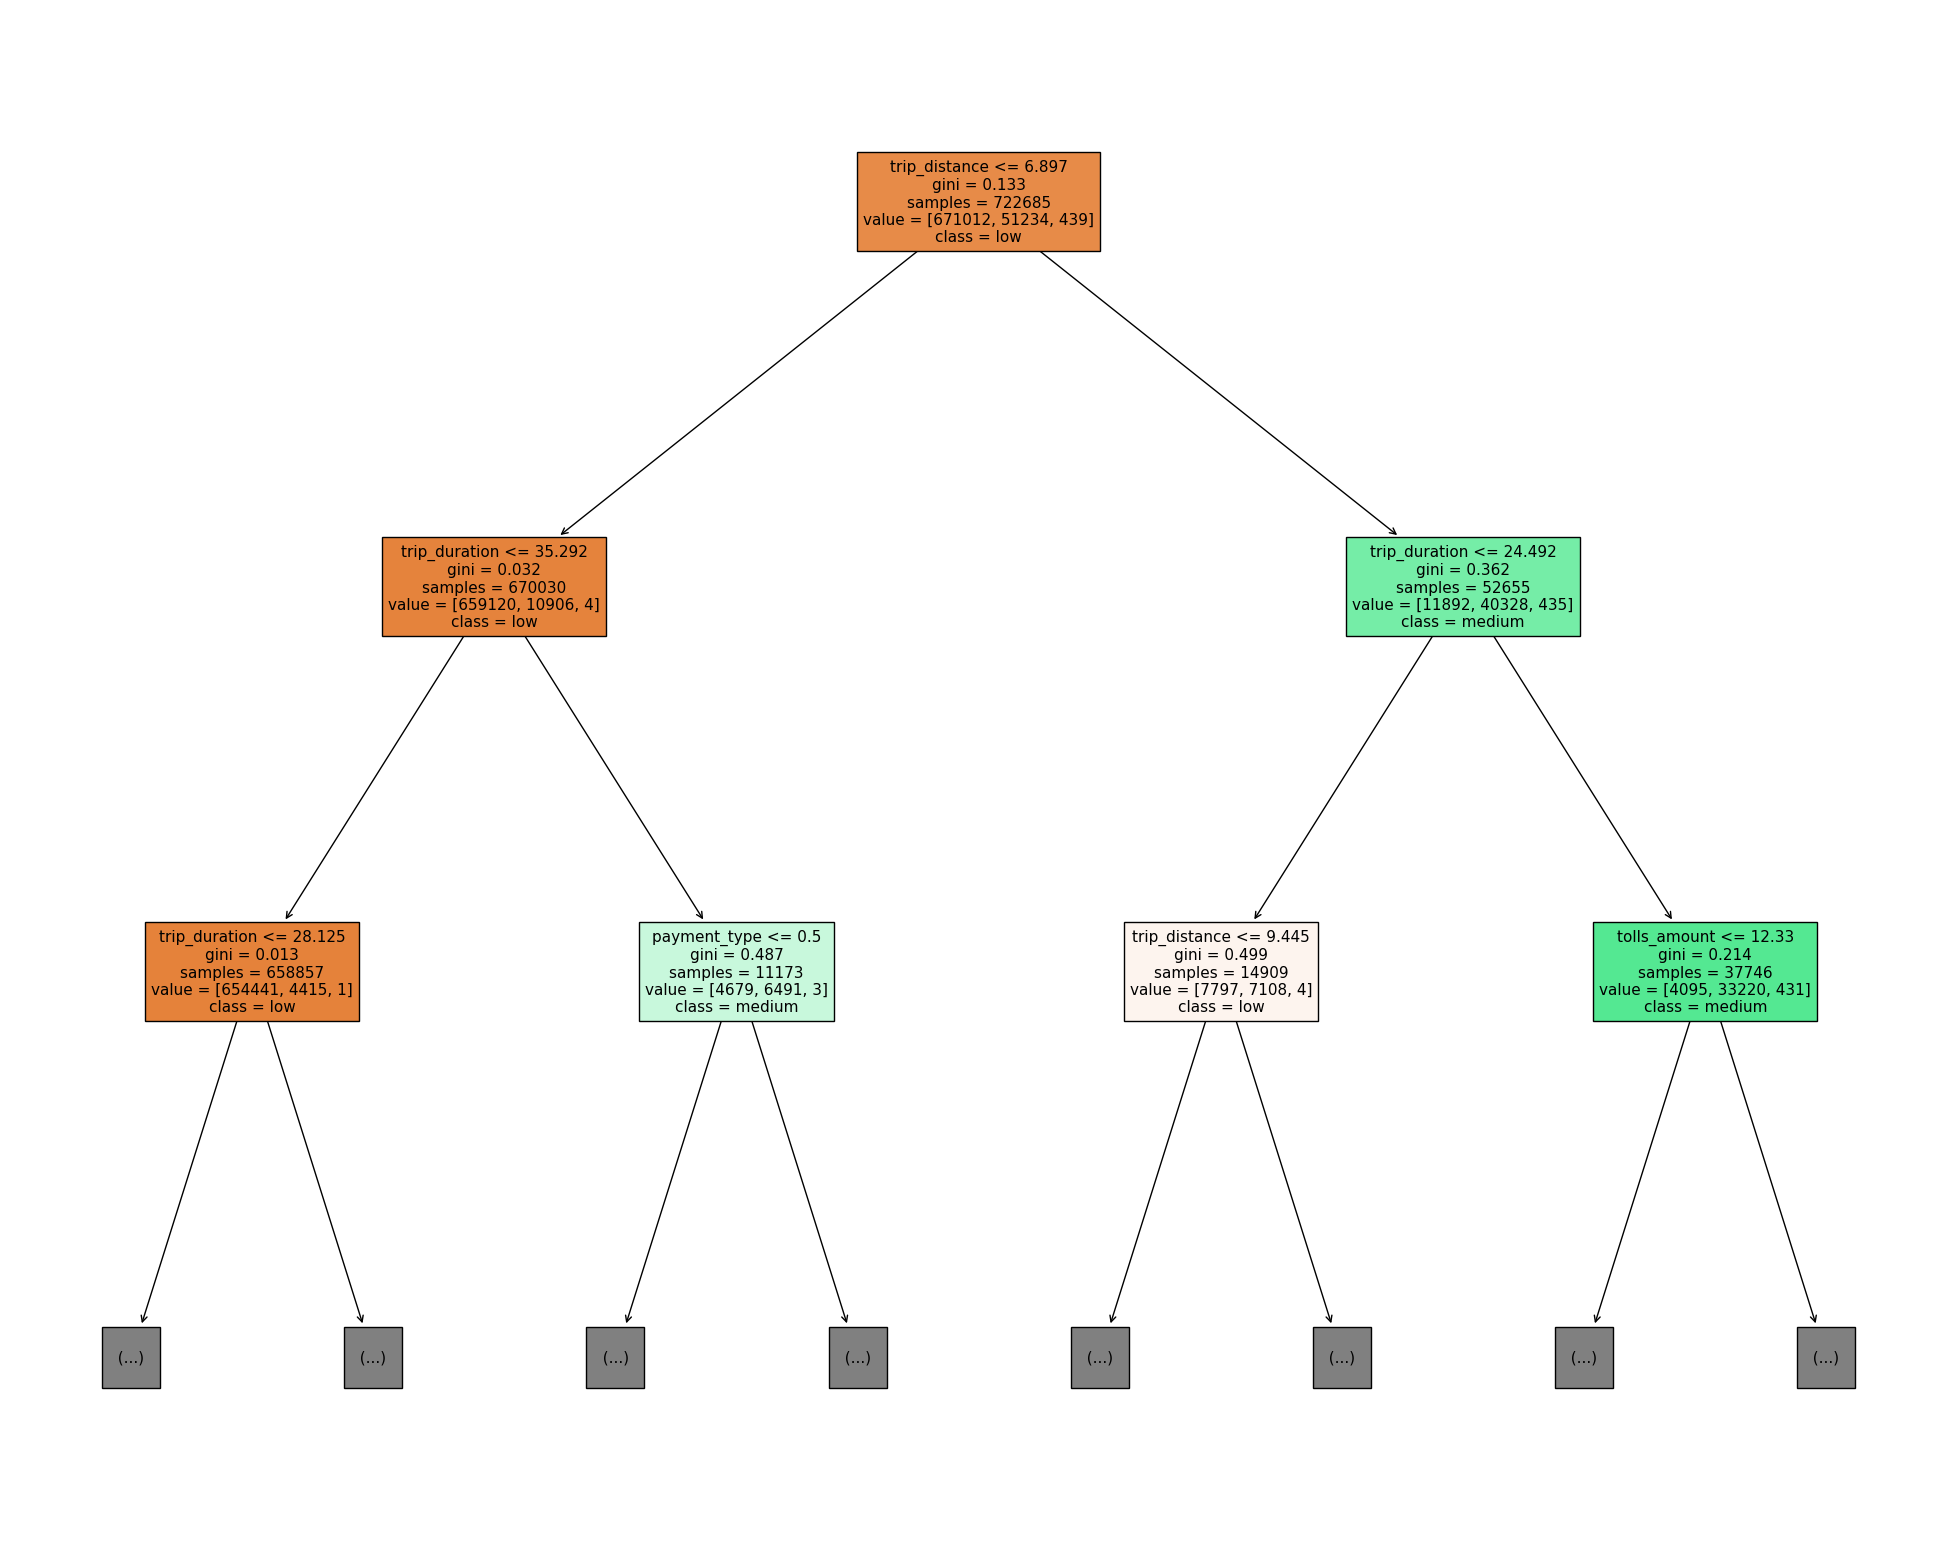

In [145]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree,max_depth=2,feature_names=cols,class_names=['low','medium','high'],filled=True)

In [33]:
feat_importance=pd.DataFrame(dtree.feature_importances_,index=x.columns)
feat_importance.head(25)

,0
vendor,0.000879
store_and_fwd_flag,0.000097
rate_type,0.003524
pu_location,0.010178
do_location,0.012444
passenger_count,0.001454
trip_distance,0.761866
payment_type,0.053762
trip_type,0.001034
trip_duration,0.150356


### Cross Validation

In [34]:
cv_score=cross_val_score(dtree, X, y, cv=4)
cv_score

array([0.97403352, 0.97508737, 0.97388629, 0.97357246])

In [35]:
cv_average=np.average(cv_score)
print(np.average(cv_score))


0.9741449117015754


### Kfolds validation

In [36]:
k_folds = KFold(n_splits = 5)
scores = cross_val_score(dtree, x, y, cv = k_folds)

In [37]:
scores

array([0.97473388, 0.97429316, 0.97519881, 0.97330021, 0.97402182])

In [38]:
kfold_avg=np.average(scores)
kfold_avg


0.974309574027789

### Stratified Kfolds

In [39]:
skf = StratifiedKFold(n_splits=5, shuffle=False)
lst_accu_stratified =cross_val_score(dtree, x, y, cv = skf)

In [40]:
lst_accu_stratified

array([0.97387181, 0.97482105, 0.97508742, 0.97393949, 0.97436084])

In [41]:
stratified_avg=np.average(lst_accu_stratified)
stratified_avg


0.9744161217930163

# $II-$ Random Forrests


In [20]:
rf = RandomForestClassifier(max_depth=8)

### Train/Test Split


In [101]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [102]:
rf_tt=rf.score(X_test,y_test)
rf_tt

0.976211001443225

In [103]:
y_rf=rf.predict(X_test)

### $A-$ Confusion Matrix

Text(0.5, 0.98, 'Confusion Matrix for Random Forrest Model')

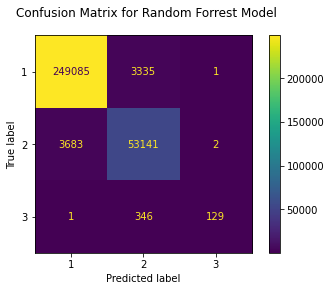

In [104]:
cm2=confusion_matrix(y_test,y_rf)
labels=[1,2,3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=labels)
disp.plot()
disp.figure_.suptitle('Confusion Matrix for Random Forrest Model')

### $B-$ ROC

In [21]:
y_score_rf = rf.fit(X_train, y_train).predict_proba(X_test)

In [23]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


In [24]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
1.00


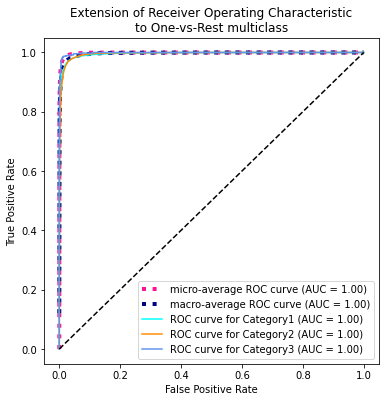

In [25]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_rf[:, class_id],
        name=f"ROC curve for Category{target_categories[class_id]}",
        color=color,
        ax=ax,
    )

# Add chance level (y=x) line (solid black, with legend entry)
ax.plot([0, 1], [0, 1], color="black", linestyle="--", label="Chance level (AUC = 0.5)")

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

### Cross Validation

In [105]:
cv_score2=cross_val_score(rf, x, y, cv=4)
cv_score2

array([0.97530434, 0.97667589, 0.9760986 , 0.97599399])

### Kfolds 

In [147]:
rf_kfold=cross_val_score(rf, x, y, cv=k_folds)
rf_kfold

array([0.9776058 , 0.97698589, 0.97727163, 0.97582828, 0.9766516 ])

### Stratified Kfolds

In [148]:
rf_skf=cross_val_score(rf, x, y, cv=skf)

In [149]:
rf_skf

array([0.97625943, 0.97730553, 0.97734427, 0.97625932, 0.97676784])

# $III-$ Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')

### Train/test Split

In [28]:
lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [31]:
ylr=lr.predict(x_test)

In [29]:
lr_score=lr.score(x_test,y_test)
lr_score

0.9740413207930958

### $A-$ Confusion Matrix

Text(0.5, 0.98, 'Confusion Matrix for Log reg Model')

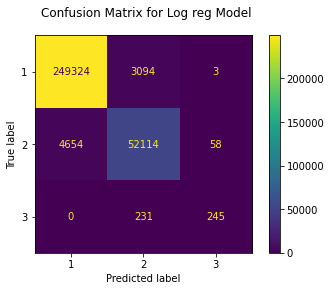

In [32]:
cm3=confusion_matrix(y_test,ylr)
labels=[1,2,3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=labels)
disp.plot()
disp.figure_.suptitle('Confusion Matrix for Log reg Model')

### $B-$ ROC

In [33]:
y_score_lr = lr.fit(X_train, y_train).predict_proba(X_test)

In [34]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


In [35]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
1.00


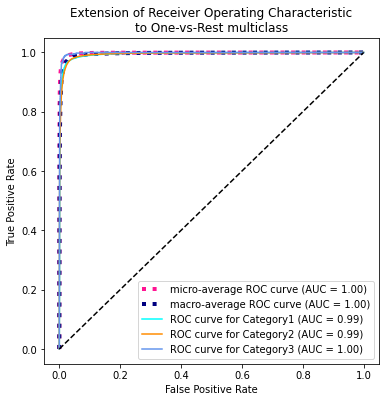

In [36]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_lr[:, class_id],
        name=f"ROC curve for Category{target_categories[class_id]}",
        color=color,
        ax=ax,
    )

# Add chance level (y=x) line (solid black, with legend entry)
ax.plot([0, 1], [0, 1], color="black", linestyle="--", label="Chance level (AUC = 0.5)")

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

In [189]:
lr.coef_

array([[-2.42138036e-01, -5.60200646e-02,  1.82869524e+00,
         1.31787314e-03, -1.35333513e-03, -1.05319718e-02,
        -1.43059895e+00, -2.71251356e-01, -7.88905043e-01,
        -1.44434613e+00, -2.64513310e+00, -3.59468071e+00,
        -2.55405062e-01,  1.95416553e-01,  4.21623763e-02,
         9.48516442e-03],
       [-1.03991932e-01,  8.21203264e-02, -8.28856095e-01,
        -4.51090404e-05, -2.65776254e-04, -7.31983585e-04,
         4.95922690e-01,  2.46491189e-01,  2.67490015e-01,
         1.56240291e+00,  2.90631206e-01,  1.81233334e+00,
         9.83372516e-02,  1.80544527e-01, -8.26277168e-02,
         7.43265984e-03],
       [ 3.46129968e-01, -2.61002618e-02, -9.99839149e-01,
        -1.27276410e-03,  1.61911138e-03,  1.12639554e-02,
         9.34676257e-01,  2.47601665e-02,  5.21415027e-01,
        -1.18056774e-01,  2.35450189e+00,  1.78234737e+00,
         1.57067810e-01, -3.75961081e-01,  4.04653406e-02,
        -1.69178243e-02]])

### Cross Validation

In [190]:
cv_score3=cross_val_score(lr, x, y, cv=5)
cv_score3

array([0.97479683, 0.9746467 , 0.97520365, 0.97441411, 0.97443833])

### Kfolds

In [38]:
skf = StratifiedKFold(n_splits=5, shuffle=False)
lr_strat_kfolds=cross_val_score(lr, x, y, cv=skf)
lr_strat_kfolds

array([0.97390087, 0.97428347, 0.97446267, 0.97425429, 0.97379904])

# $IV-$ Naive bayes Classifier

In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032408 entries, 0 to 1032407
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   vendor                 1032408 non-null  int64  
 1   store_and_fwd_flag     1032408 non-null  int64  
 2   rate_type              1032408 non-null  int64  
 3   pu_location            1032408 non-null  int64  
 4   do_location            1032408 non-null  int64  
 5   passenger_count        1032408 non-null  float64
 6   trip_distance          1032408 non-null  float64
 7   fare_amount            1032408 non-null  float64
 8   extra                  1032408 non-null  float64
 9   mta_tax                1032408 non-null  float64
 10  tip_amount             1032408 non-null  float64
 11  tolls_amount           1032408 non-null  float64
 12  improvement_surcharge  1032408 non-null  float64
 13  total_amount           1032408 non-null  float64
 14  payment_type      

In [39]:
df2['category'].value_counts()
p1=840822/1032408
p2=188058/1032408 
p3=3528/1032408  
p1,p2,p3

(0.8144280168305553, 0.1821547295255364, 0.003417253643908222)

In [40]:
p=[p1,p2,p3]

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
gnb = GaussianNB(priors=p)


### Train/Test Split


In [42]:
gnb.fit(x_train,y_train)

GaussianNB(priors=[0.8144280168305553, 0.1821547295255364,
                   0.003417253643908222])

In [43]:
ygb=gnb.predict(x_test)


In [44]:
gnb.score(x_test,y_test)

0.9484345689535488

### $A-$ Confusion Matrix

Text(0.5, 0.98, 'Confusion Matrix for Naive bayes model')

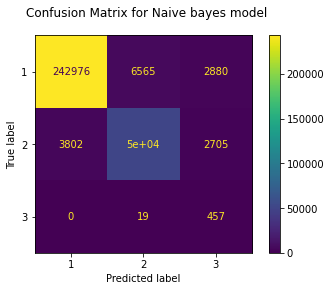

In [45]:
cm4=confusion_matrix(y_test,ygb)
labels=[1,2,3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=labels)
disp.plot()
disp.figure_.suptitle('Confusion Matrix for Naive bayes model')

### $B-$ ROC

In [46]:
y_score_gnb = gnb.fit(X_train, y_train).predict_proba(X_test)

In [47]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_gnb.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.99


In [48]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_gnb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.83


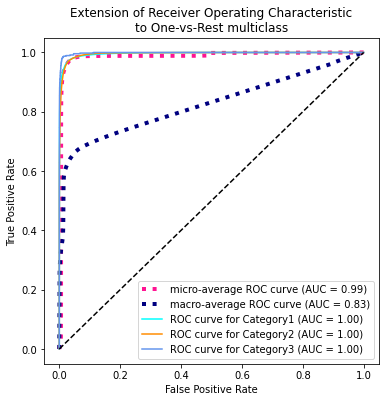

In [49]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_rf[:, class_id],
        name=f"ROC curve for Category{target_categories[class_id]}",
        color=color,
        ax=ax,
    )

# Add chance level (y=x) line (solid black, with legend entry)
ax.plot([0, 1], [0, 1], color="black", linestyle="--", label="Chance level (AUC = 0.5)")

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

### K-folds

In [192]:
gnb_cv=cross_val_score(gnb,x,y,cv=k_folds)

In [191]:
gnb_cv

array([0.955168  , 0.95356012, 0.95696961, 0.34060277, 0.95333227])

In [159]:
from sklearn.preprocessing import PowerTransformer

In [160]:
pt = PowerTransformer()
px_train=pt.fit_transform(x_train)
px_test=pt.fit_transform(x_test)

# $V-$ K neighbors Classifer

In [50]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
ykn=neigh.predict(x_test)

In [52]:
neigh.score(x_test,y_test)

0.9625730087852694

### $A-$ Confusion Matrix

Text(0.5, 0.98, 'Confusion Matrix for K neighbors model')

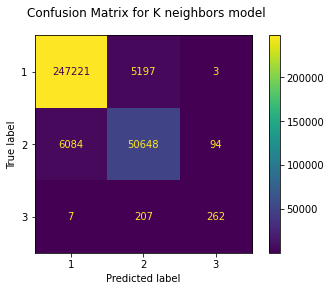

In [53]:
cm5=confusion_matrix(y_test,ykn)
labels=[1,2,3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=labels)
disp.plot()
disp.figure_.suptitle('Confusion Matrix for K neighbors model')

### $B-$ ROC

In [54]:
y_score_neigh = neigh.fit(X_train, y_train).predict_proba(X_test)

In [55]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_neigh.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.99


In [56]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_neigh[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.96


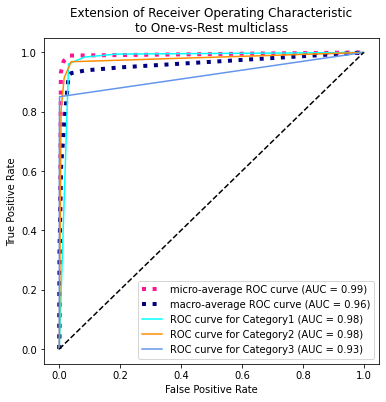

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_neigh[:, class_id],
        name=f"ROC curve for Category{target_categories[class_id]}",
        color=color,
        ax=ax,
    )

# Add chance level (y=x) line (solid black, with legend entry)
ax.plot([0, 1], [0, 1], color="black", linestyle="--", label="Chance level (AUC = 0.5)")

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

### K-Folds

In [31]:
knn_cv=cross_val_score(neigh,x,y,cv=k_folds)

In [32]:
knn_cv

array([0.97921368, 0.97937835, 0.98030337, 0.9775282 , 0.97877771])

In [33]:
knn_Str_cv=cross_val_score(neigh,x,y,cv=skf)
knn_Str_cv

array([0.97819665, 0.97974158, 0.98029852, 0.97827403, 0.97838058])